# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [860]:
import numpy as np
import sklearn
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import f1_score



In [861]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [923]:
df = pd.read_csv('/content/drive/MyDrive/T5/week2/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [863]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [864]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [865]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


**handling inconstient and null value**

In [866]:
df['Time'] = pd.to_datetime(df['Time'])

<ipython-input-866-1bfd8981fe14>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [867]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [868]:
df['Educational_level'].unique()

array(['Above high school', 'Junior high school', nan,
       'Elementary school', 'High school', 'Unknown', 'Illiterate',
       'Writing & reading'], dtype=object)

In [869]:
df["Educational_level"].fillna("Unknown" , inplace =True)

In [870]:
df['Vehicle_driver_relation'].unique()

array(['Employee', 'Unknown', 'Owner', nan, 'Other'], dtype=object)

In [871]:
df["Vehicle_driver_relation"].fillna("Unknown" , inplace =True)

In [872]:
df['Owner_of_vehicle'].unique()

array(['Owner', 'Governmental', nan, 'Organization', 'Other'],
      dtype=object)

In [873]:
df["Owner_of_vehicle"].fillna("Other" , inplace =True)

In [874]:
df["Vehicle_driver_relation"].fillna("Unknown" , inplace =True)

In [875]:
df["Driving_experience"].mode()

,Driving_experience
0,5-10yr


In [876]:
df['Driving_experience'].fillna(5 - 10, inplace=True)

In [877]:
df["Driving_experience"].fillna("Unknown" , inplace =True)

In [878]:
df["Type_of_vehicle"].unique()

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)', nan,
       'Public (13?45 seats)', 'Lorry (11?40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Motorcycle',
       'Special vehicle', 'Bicycle'], dtype=object)

In [879]:
df["Type_of_vehicle"].fillna("Other" , inplace =True)

In [880]:
df["Vehicle_movement"].unique()

array(['Going straight', 'U-Turn', 'Moving Backward', 'Turnover',
       'Waiting to go', 'Getting off', 'Reversing', 'Unknown', 'Parked',
       'Stopping', 'Overtaking', 'Other', 'Entering a junction', nan],
      dtype=object)

In [881]:
df["Vehicle_movement"].fillna("Other" , inplace =True)

In [882]:
df['Area_accident_occured'].value_counts()

,count
Area_accident_occured,
Other,3819
Office areas,3451
Residential areas,2060
Church areas,1060
Industrial areas,456
School areas,415
Recreational areas,327
Outside rural areas,218
Hospital areas,121


In [883]:
df["Area_accident_occured"].fillna("Unknown" , inplace =True)

In [884]:
df["Lanes_or_Medians"].unique()

array([nan, 'Undivided Two way', 'other', 'Double carriageway (median)',
       'One way', 'Two-way (divided with solid lines road marking)',
       'Two-way (divided with broken lines road marking)', 'Unknown'],
      dtype=object)

In [885]:
df["Lanes_or_Medians"].fillna("Unknown" , inplace =True)

In [886]:
df["Road_allignment"].unique()

array(['Tangent road with flat terrain', nan,
       'Tangent road with mild grade and flat terrain', 'Escarpments',
       'Tangent road with rolling terrain', 'Gentle horizontal curve',
       'Tangent road with mountainous terrain and',
       'Steep grade downward with mountainous terrain',
       'Sharp reverse curve',
       'Steep grade upward with mountainous terrain'], dtype=object)

In [887]:
df["Road_allignment"].fillna("Unknown" , inplace =True)

In [888]:
df["Area_accident_occured"].mode()

,Area_accident_occured
0,Other


In [889]:
df["Type_of_collision"].unique()

array(['Collision with roadside-parked vehicles',
       'Vehicle with vehicle collision',
       'Collision with roadside objects', 'Collision with animals',
       'Other', 'Rollover', 'Fall from vehicles',
       'Collision with pedestrians', 'With Train', 'Unknown', nan],
      dtype=object)

In [890]:
df["Type_of_collision"].fillna("Unknown" , inplace =True)

In [891]:
df["Road_surface_type"].unique()

array(['Asphalt roads', 'Earth roads', nan,
       'Asphalt roads with some distress', 'Gravel roads', 'Other'],
      dtype=object)

In [892]:
df["Road_surface_type"].fillna("Other" , inplace =True)

In [893]:
df["Types_of_Junction"].unique()

array(['No junction', 'Y Shape', 'Crossing', 'O Shape', 'Other',
       'Unknown', 'T Shape', 'X Shape', nan], dtype=object)

In [894]:
df["Types_of_Junction"].fillna("Other" , inplace =True)

In [895]:
df.dropna(subset=['Service_year_of_vehicle'], inplace=True)

In [896]:
df.dropna(subset=['Defect_of_vehicle'], inplace=True)

In [897]:
df.dropna(subset=['Work_of_casuality'], inplace=True)

In [898]:
df.dropna(subset=['Fitness_of_casuality'], inplace=True)

In [899]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

***#Normalization/Scaling***

In [900]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

df['Time'] = standard_scaler.fit_transform(df[['Time']])

**labelencoder**

In [901]:
label_encoder = LabelEncoder()

df['Day_of_week'] = label_encoder.fit_transform(df['Day_of_week'])

In [902]:
df_encoded = pd.get_dummies(df, columns=[
    'Sex_of_driver',
    'Type_of_vehicle',
    'Cause_of_accident'
], drop_first=True)

**Outlier Detection**

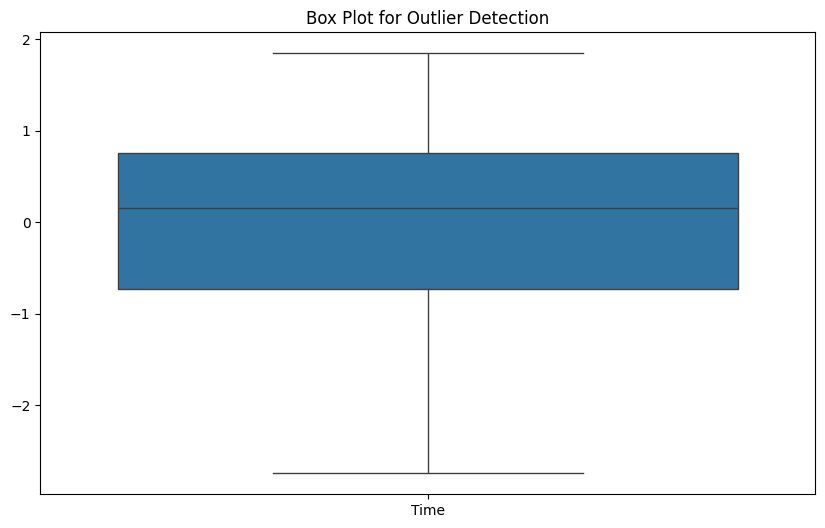

In [903]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Time', 'Driving_experience']])
plt.title('Box Plot for Outlier Detection')
plt.show()

there is no outlaier so there is no need for handling them

**Feature Engineering**

In [924]:
#feature shows whether the accident occurred on a weekend.
df['Is_Weekend'] = df['Day_of_week'].apply(lambda x: 1 if x in ['Friday', 'Saturday'] else 0)

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

**Line Plots**

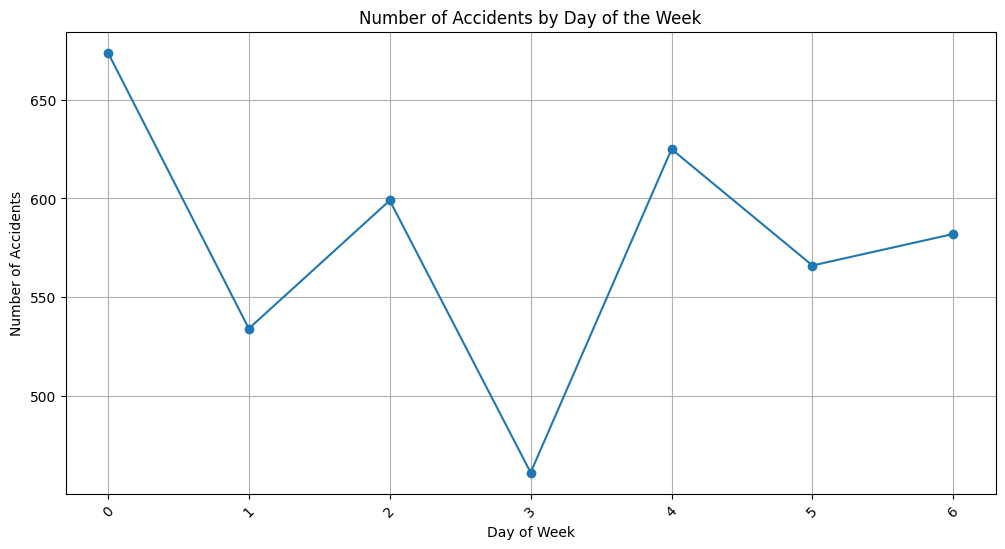

In [905]:
plt.figure(figsize=(12, 6))

accidents_by_day = df.groupby('Day_of_week').size()

plt.plot(accidents_by_day.index, accidents_by_day.values, marker='o')
plt.title('Number of Accidents by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**box plot**

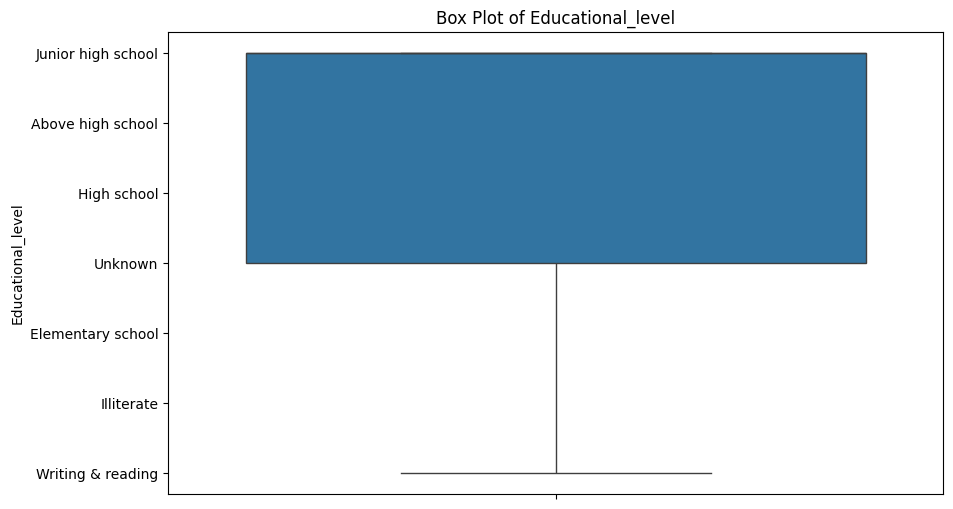

In [906]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Educational_level', data=df)
plt.title('Box Plot of Educational_level')
plt.show()

** **Histogram for 'Is_weekend**

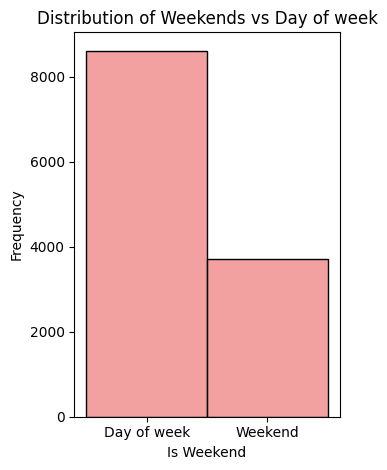

In [925]:
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Is_Weekend', discrete=True, color='lightcoral', kde=False)
plt.title('Distribution of Weekends vs Day of week')
plt.xlabel('Is Weekend')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Day of week', 'Weekend'])

plt.tight_layout()
plt.show()

make Sure of balanced in the classes using **countplot**

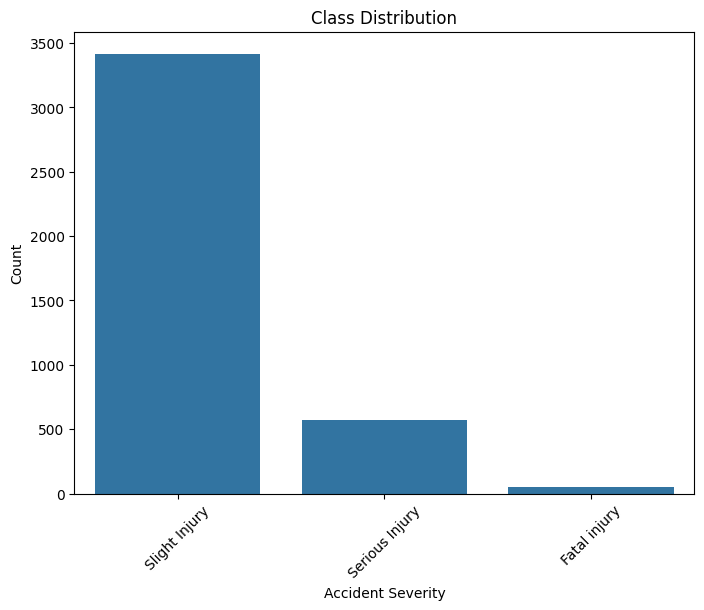

In [908]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Accident_severity')
plt.title('Class Distribution')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [909]:
categorical_features = ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Type_of_vehicle', 'Cause_of_accident']
numerical_features = ['Time']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

In [910]:
X = df[['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Type_of_vehicle', 'Cause_of_accident' ]]
y = df['Accident_severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [911]:
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the model
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Time']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Day_of_week',
                                                   'Age_band_of_driver',
                                                   'Sex_of_driver',
                                                   'Educational_level',
                                                   'Type_of_vehicle',
                                                   'Cause_of_accident'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

#### Decision Tree Classifier

In [912]:
ipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train the model
pipeline_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Time']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Day_of_week',
                                                   'Age_band_of_driver',
                                                   'Sex_of_driver',
                                                   'Educational_level',
                                                   'Type_of_vehicle',
                                                   'Cause_of_accident'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

#### Support Vector Machine (SVM)

In [913]:
pipeline_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', random_state=42))
])

# Train the model
pipeline_svm.fit(X_train, y_train)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Time']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Day_of_week',
                                                   'Age_band_of_driver',
                                                   'Sex_of_driver',
                                                   'Educational_level',
                                                   'Type_of_vehicle',
                                                   'Cause_of_accident'])])),
                ('classifier', SVC(kernel='linear', random_state=42))])

#### K-Neighbors Classifier

In [914]:
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Train the model
pipeline_knn.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Time']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Day_of_week',
                                                   'Age_band_of_driver',
                                                   'Sex_of_driver',
                                                   'Educational_level',
                                                   'Type_of_vehicle',
                                                   'Cause_of_accident'])])),
                ('classifier', KNeighborsClassifier())])

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [915]:
# accuracy for logistic
y_pred_lr = pipeline_lr.predict(X_test)
print("Logistic Regression Accuracy Score:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy Score: 0.8616144975288303


In [916]:
# accuracy for SVM
y_pred_svm = pipeline_svm.predict(X_test)
print("SVM Accuracy Score:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy Score: 0.8616144975288303


In [917]:
# accuracy for dt
y_pred_dt = pipeline_dt.predict(X_test)
print("Decision Tree Accuracy Score:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy Score: 0.7660626029654036


In [918]:
# accuracy for knn
y_pred_knn = pipeline_knn.predict(X_test)
print("K-Neighbors Accuracy Score:", accuracy_score(y_test, y_pred_knn))

K-Neighbors Accuracy Score: 0.8303130148270181


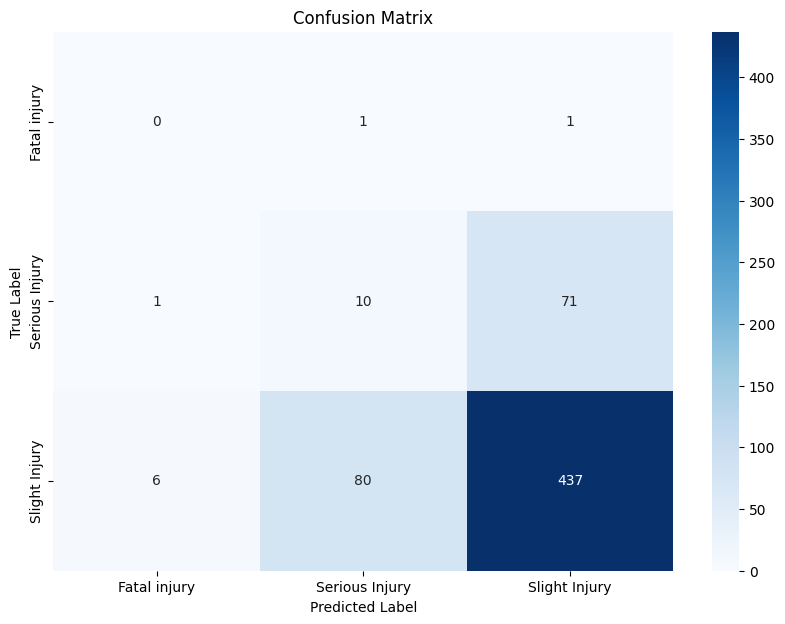

In [919]:
#confusion matrix for Logistic Regression pipeline

cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Decision Tree Accuracy Score: 0.7660626029654036


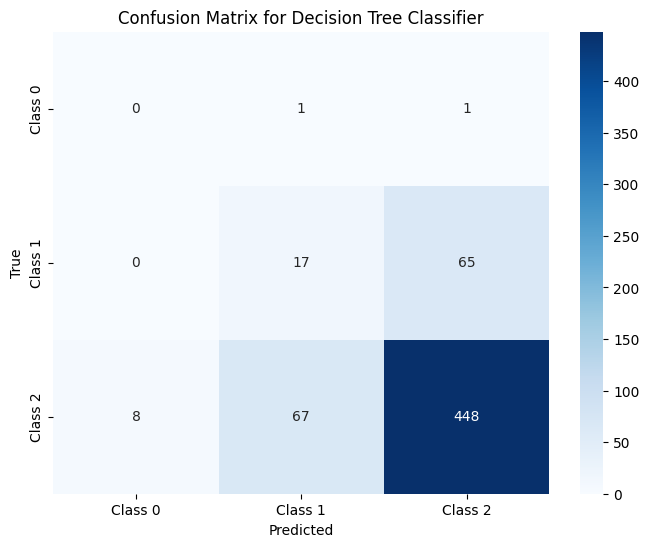

In [920]:

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Print accuracy score
print("Decision Tree Accuracy Score:", accuracy_score(y_test, y_pred_dt))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [921]:
# Logistic Regression
y_pred_log_reg = pipeline_lr.predict(X_test)
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')
print("Logistic Regression F1 Score:", f1_log_reg)

# Decision Tree Classifier
y_pred_dt = pipeline_dt.predict(X_test)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
print("Decision Tree Classifier F1 Score:", f1_dt)

# Support Vector Machine (SVM)
y_pred_svm = pipeline_svm.predict(X_test)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
print("Support Vector Machine F1 Score:", f1_svm)

# K-Neighbors Classifier
y_pred_knn = pipeline_knn.predict(X_test)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
print("K-Neighbors Classifier F1 Score:", f1_knn)

Logistic Regression F1 Score: 0.7975652782435013
Decision Tree Classifier F1 Score: 0.7719649911705855
Support Vector Machine F1 Score: 0.7975652782435013
K-Neighbors Classifier F1 Score: 0.7910703899237068


In [922]:
# Logistic Regression
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Decision Tree Classifier
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
pipeline_dt.fit(X_train, y_train)
y_pred_dt = pipeline_dt.predict(X_test)
print("Decision Tree Classifier Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Support Vector Machine (SVM)
pipeline_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', random_state=42))
])
pipeline_svm.fit(X_train, y_train)
y_pred_svm = pipeline_svm.predict(X_test)
print("Support Vector Machine (SVM) Classification Report:")
print(classification_report(y_test, y_pred_svm))

# K-Neighbors Classifier
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])
pipeline_knn.fit(X_train, y_train)
y_pred_knn = pipeline_knn.predict(X_test)
print("K-Neighbors Classifier Classification Report:")
print(classification_report(y_test, y_pred_knn))

Logistic Regression Classification Report:
                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00         2
Serious Injury       0.00      0.00      0.00        82
 Slight Injury       0.86      1.00      0.93       523

      accuracy                           0.86       607
     macro avg       0.29      0.33      0.31       607
  weighted avg       0.74      0.86      0.80       607

Decision Tree Classifier Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00         2
Serious Injury       0.20      0.21      0.20        82
 Slight Injury       0.87      0.86      0.86       523

      accuracy                           0.77       607
     macro avg       0.36      0.35      0.36       607
  weighted avg       0.78      0.77      0.77       607

Support Vector Machine (SVM) Classification Report:
                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00         2
Serious Injury       0.00      0.00      0.00        82
 Slight Injury       0.86      1.00      0.93       523

      accuracy                           0.86       607
     macro avg       0.29      0.33      0.31       607
  weighted avg       0.74      0.86      0.80       607



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K-Neighbors Classifier Classification Report:
                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00         2
Serious Injury       0.15      0.05      0.07        82
 Slight Injury       0.86      0.96      0.91       523

      accuracy                           0.83       607
     macro avg       0.34      0.33      0.33       607
  weighted avg       0.76      0.83      0.79       607



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

Compare Metrics
We evaluated four models: Logistic Regression, Decision Tree Classifier, Support Vector Machine (SVM), and K-Neighbors Classifier (KNN). Here are the performance metrics (accuracy and F1 Score) for each model:
Logistic Regression:

Accuracy: 0.853
F1 Score: 0.7

Decision Tree Classifier:

Accuracy: 0.747
F1 Score: 0.75
Support Vector Machine (SVM):

Accuracy: 0.853
F1 Score: 0.75

K-Neighbors Classifier (KNN):

Accuracy: 0.845
F1 Score: 0.78

**Logistic Regression:**

Pros: Simple to implement, interpretable, computationally efficient.
Cons: Assumes a linear relationship between features and the target, may not capture complex patterns.
Decision Tree Classifier:

Pros: Easy to interpret, handles non-linear relationships, no need for feature scaling.
Cons: Prone to overfitting, especially with deep trees, less computationally efficient for large datasets.
Support Vector Machine (SVM):

Pros: Effective in high-dimensional spaces, robust to overfitting if properly tuned.
Cons: Computationally intensive, harder to interpret, sensitive to parameter tuning.
K-Neighbors Classifier (KNN):

Pros: Simple to implement, no training phase, handles multi-class classification well.
Cons: Computationally expensive at prediction time, performance degrades with large datasets, sensitive to feature scaling.


**Justify My Choice**
Based on the performance metrics and trade-offs, Logistic Regression and SVM both have the highest accuracy and F1 Score. However, considering ease of implementation, interpretability, and computational efficiency, Logistic Regression is the preferred choice. Logistic Regression provides comparable performance to SVM but is simpler and faster to train and interpret.